# Frangi Vesselness Filter

In [1]:
#@ImageJ ij

This plugin implements the algorithm for detection of vessel- or tube-like structures in 2D and 3D images described Frangi et al 1998. Example is shown below. Here we use an example of a [brian image](https://commons.wikimedia.org/w/index.php?curid=5930234) (By SBarnes - Own work, CC BY-SA 3.0) 

[INFO] Populating metadata
[INFO] Populating metadata


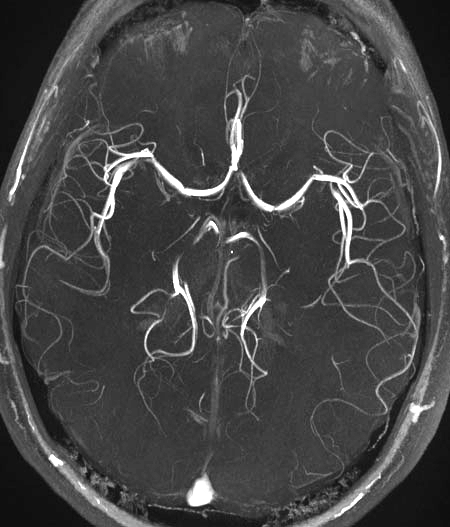

In [2]:
input = ij.io().open("https://upload.wikimedia.org/wikipedia/commons/6/66/Mra-mip.jpg")

In [3]:
import java.util.Arrays
import net.imglib2.img.Img
import net.imglib2.img.array.ArrayImgs
import net.imglib2.type.numeric.real.DoubleType
import net.imglib2.type.numeric.integer.IntType
import net.imagej.ops.filter.vesselness.DefaultFrangi

//scales refers the the pixel distance at which the filter operates. Larger scales measure larger structures.
//spacing refers to the physical distance between pixels. The default setting is {1, 1, 1...}
#@String(label="spacing: e.g. \"1, 1, 1\"",value="1, 1, 1") spacing

//parse the strings
double[] spacings = Arrays.stream(spacing.split(",")).map{t -> Double.parseDouble(t.trim())}.collect() as double[]
long[] dims = new long[input.numDimensions()]
input.dimensions(dims)
actualOutput = ArrayImgs.doubles(dims)
ij.op().run(DefaultFrangi.class, actualOutput, input, spacings, 1)
["Output: ", actualOutput]

Output:
